## Trying out Open Street Map with Transit
### Carolyn Pugh

#### Import Libraries

In [30]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [31]:
address = 'Downtown, Los Angeles, CA'

In [32]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'public_transport':True},dist=1000)

CPU times: user 67.3 ms, sys: 9.86 ms, total: 77.2 ms
Wall time: 157 ms


In [33]:
osm.shape

(204, 37)

In [34]:
# show me 10 random rows
osm.sample(10)

name  \
element_type osmid                               
node         4315177506             Main & 2nd   
             9612291740           Spring & 7th   
             6279600835         Broadway & 5th   
             3299281733        Pershing Square   
             4315176053             Main & 4th   
             5002237122  Los Angeles & Olympic   
             5002237824          Pico & Santee   
             6462461487            Main & 11th   
             9607166835             6th & Hill   
             5002237825           Pico & Maple   

                                                               network  \
element_type osmid                                                       
node         4315177506                               Metro Local;DASH   
             9612291740                                    Metro Local   
             6279600835                                    Metro Local   
             3299281733                                         LACMTA   
             4315176053                        Metro Local;DASH;GTrans   
             5002237122                                           DASH   
             5002237824                                           DASH   
             6462461487                             Metro Local;GTrans   
             9607166835  Metro Local;Antelope Valley Transit Authority   
             5002237825                                           DASH   

                                                                  operator  \
element_type osmid                                                           
node         4315177506  Los Angeles County Metropolitan Transportation...   
             9612291740  Los Angeles County Metropolitan Transportation...   
             6279600835  Los Angeles County Metropolitan Transportation...   
             3299281733  Los Angeles County Metropolitan Transportation...   
             4315176053  Los Angeles County Metropolitan Transportation...   
             5002237122           Los Angeles Department of Transportation   
             5002237824           Los Angeles Department of Transportation   
             6462461487  Los Angeles County Metropolitan Transportation...   
             9607166835  Los Angeles County Metropolitan Transportation...   
             5002237825           Los Angeles Department of Transportation   

                        public_transport railway station subway wheelchair  \
element_type osmid                                                           
node         4315177506         platform     NaN     NaN    NaN        NaN   
             9612291740         platform     NaN     NaN    NaN        NaN   
             6279600835         platform     NaN     NaN    NaN        NaN   
             3299281733    stop_position    stop     NaN    yes        NaN   
             4315176053         platform     NaN     NaN    NaN        NaN   
             5002237122         platform     NaN     NaN    NaN        NaN   
             5002237824         platform     NaN     NaN    NaN        NaN   
             6462461487         platform     NaN     NaN    NaN        NaN   
             9607166835         platform     NaN     NaN    NaN        NaN   
             5002237825         platform     NaN     NaN    NaN        NaN   

                        wikidata                     geometry  ...  bin  \
element_type osmid                                             ...        
node         4315177506      NaN  POINT (-118.24414 34.05131)  ...  NaN   
             9612291740      NaN  POINT (-118.25275 34.04419)  ...  NaN   
             6279600835      NaN  POINT (-118.25023 34.04844)  ...  yes   
             3299281733      NaN  POINT (-118.25152 34.04918)  ...  NaN   
             4315176053      NaN  POINT (-118.24691 34.04833)  ...  NaN   
             5002237122      NaN  POINT (-118.25573 34.03977)  ...  NaN   
             5002237824      NaN  POINT (-118.25846 34.03516)  ...  NaN   
   

In [35]:
#see column names
osm.columns.tolist()

['name',
 'network',
 'operator',
 'public_transport',
 'railway',
 'station',
 'subway',
 'wheelchair',
 'wikidata',
 'geometry',
 'light_rail',
 'location',
 'bench',
 'bus',
 'highway',
 'network:wikidata',
 'network:wikipedia',
 'operator:wikidata',
 'operator:wikipedia',
 'shelter',
 'source_ref',
 'aerialway',
 'aerialway:access',
 'aerialway:summer:access',
 'route_ref',
 'network:short',
 'ref',
 'bin',
 'tactile_paving',
 'operator:short',
 'description',
 'nodes',
 'covered',
 'layer',
 'level',
 'tunnel',
 'area']

In [36]:
## subset it
columns_to_keep = ['geometry','name','network','railway','subway', 'station', 'light_rail', 'location','bench','bus','highway', 'shelter', 'wheelchair','covered']
osm = osm[columns_to_keep]
osm.head(10)

geometry                     name  \
element_type osmid                                                              
node         268371846   POINT (-118.25101 34.04963)          Pershing Square   
             607992227   POINT (-118.24449 34.04846)        3rd & Los Angeles   
             1376441758  POINT (-118.25829 34.04910)  7th Street/Metro Center   
             1738802908  POINT (-118.24866 34.04860)             Spring & 4th   
             2819358596  POINT (-118.24986 34.05111)              Hill Street   
             3297553268  POINT (-118.25059 34.05159)             Olive Street   
             3299281732  POINT (-118.25050 34.05008)          Pershing Square   
             3299281733  POINT (-118.25152 34.04918)          Pershing Square   
             4252841892  POINT (-118.25525 34.04891)              Grand & 6th   
             4252841893  POINT (-118.25836 34.04555)              Grand & 8th   

                                           network  railway subway station  \
element_type osmid                                                           
node         268371846                      LACMTA  station    yes  subway   
             607992227        Montebello Bus Lines      NaN    NaN     NaN   
             1376441758                     LACMTA     stop    NaN     NaN   
             1738802908           Metro Local;DASH      NaN    NaN     NaN   
             2819358596                        NaN     stop    NaN     NaN   
             3297553268                        NaN     stop    NaN     NaN   
             3299281732                     LACMTA     stop    yes     NaN   
             3299281733                     LACMTA     stop    yes     NaN   
             4252841892  Metro Express;Metro Local      NaN    NaN     NaN   
             4252841893                Metro Local      NaN    NaN     NaN   

                        light_rail location bench  bus   highway shelter  \
element_type osmid                                                         
node         268371846         NaN      NaN   NaN  NaN       NaN     NaN   
             607992227         NaN      NaN   yes  yes  bus_stop      no   
             1376441758        yes      NaN   NaN  NaN       NaN     NaN   
             1738802908        NaN      NaN   NaN  yes  bus_stop     NaN   
             2819358596        NaN      NaN   NaN  NaN       NaN     NaN   
             3297553268        NaN      NaN   NaN  NaN       NaN     NaN   
             3299281732        NaN      NaN   NaN  NaN       NaN     NaN   
             3299281733        NaN      NaN   NaN  NaN       NaN     NaN   
             4252841892        NaN      NaN   yes  yes  bus_stop      no   
             4252841893        NaN      NaN   yes  yes  bus_stop      no   

                        wheelchair covered  
element_type osmid                          
node         268371846         yes     NaN  
             607992227         NaN     NaN  
             1376441758        NaN     NaN  
             1738802908        NaN     NaN  
             2819358596        NaN     NaN  
             3297553268        NaN     NaN  
             3299281732        NaN     NaN  
             3299281733        NaN     NaN  
             4252841892        NaN     NaN  
             4252841893        NaN     NaN

<AxesSubplot: >

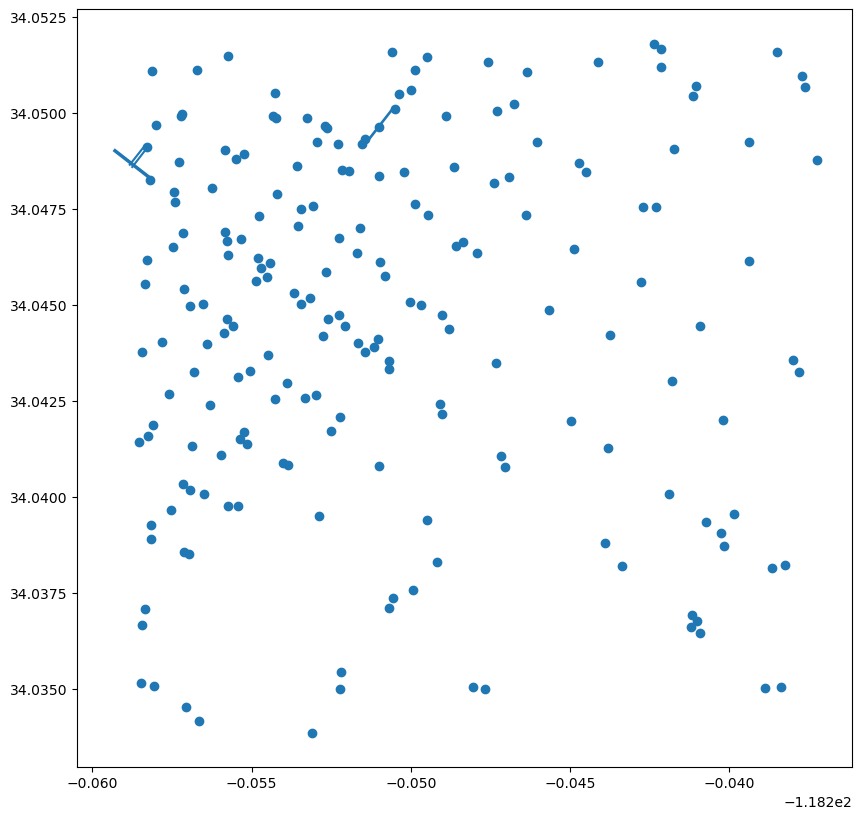

In [37]:
# plot entire dataset
osm.plot(figsize=(10,10))

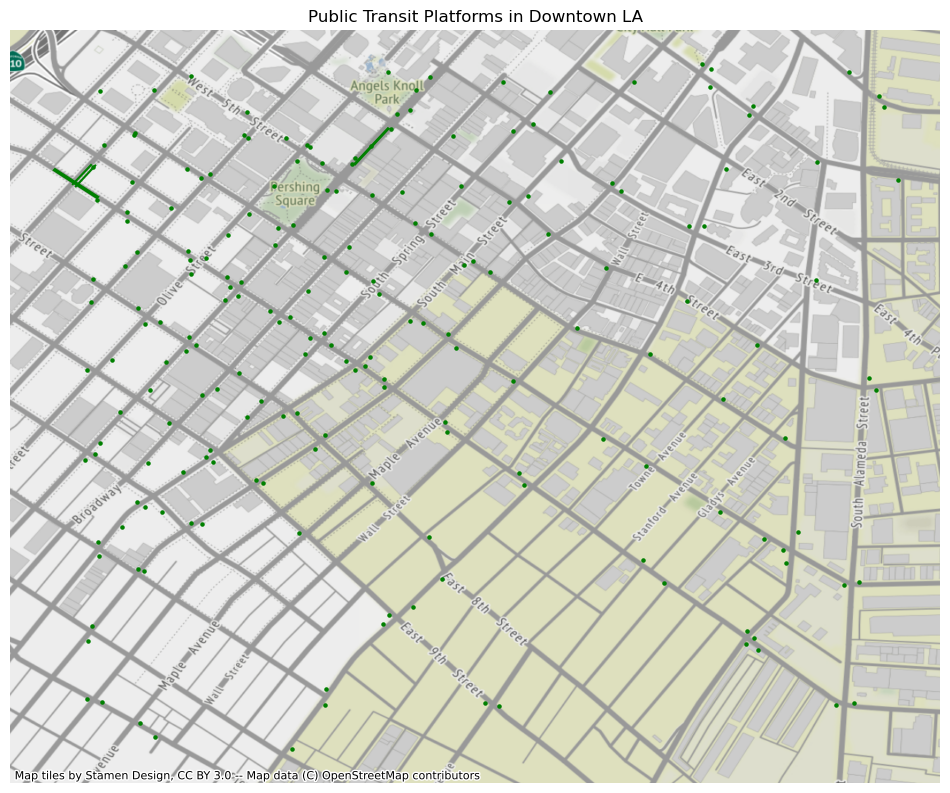

In [40]:
fig, ax = plt.subplots(figsize=(12,12))
osm.plot(ax=ax, 
        marker='.',
        markersize=20,
        color='green')
ax.axis('off')
ax.set_title('Public Transit Platforms in Downtown LA')
ctx.add_basemap(ax, crs=4326)